<a href="https://colab.research.google.com/github/depknaraynscientist/Data_Science/blob/main/Machine_Learning_Zoomcamp_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data = "https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv"

In [2]:
from google.colab import files 
uploaded = files.upload()
import pandas as pd

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [3]:
import io

In [4]:
df = pd.read_csv(io.BytesIO(uploaded['AB_NYC_2019.csv']))
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

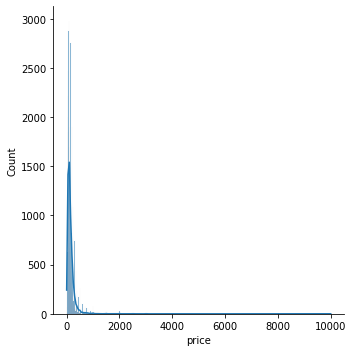

In [12]:
sns.displot(data=df, x='price', kde=True)
plt.show()

Price has a long tail.

In [14]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [15]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [17]:
df = df.loc[:, ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [19]:
df.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


reviews_per_month has missing values. 

In [21]:
df['reviews_per_month'].isnull().sum()

10052

In [22]:
df['minimum_nights'].median()

3.0

In [24]:
import numpy as np

In [41]:
#Split the data.
#Step 0 : remove price column
df.head()
y = df['price']
X = df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [42]:

#Step 1 : shuffle 
np.random.seed(42)
X_arr = X.to_numpy()
np.random.shuffle(X_arr)
X_arr


array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,           nan,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.078318e+01, -7.397372e+01,  3.000000e+01, ...,  3.400000e-01,
         5.000000e+00,  2.610000e+02],
       [ 4.077508e+01, -7.397990e+01,  2.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  2.000000e+00],
       [ 4.074657e+01, -7.394555e+01,  5.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [52]:
#Step 2 : split the data
len(X_arr)
n_train = (int) (len(X_arr) * 0.6)
n_val = (int) (len(X_arr) * 0.2)
n_test = len(X_arr) - n_train - n_val
print(n_train, n_val, n_test)
x_train = X_arr[:n_train, :]
x_val = X_arr[n_train:n_train+n_val, :]
x_test = X_arr[n_train+n_val:n_train+n_val+n_test, :]
print(len(x_train), len(x_val), len(x_test))

29337 9779 9779
29337 9779 9779


In [44]:
#log transformation + 1
y = np.log1p(y)

In [135]:
#So now, our input is in x_train, x_val and x_test
#o/p is in y
y

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

In [67]:
y.shape
y_train = y[:n_train]
y_val = y[n_train:n_train+n_val]
y_test = y[n_train+n_val:n_train+n_val+n_test]
print(y_train.shape, y_val.shape, y_test.shape)

(29337,) (9779,) (9779,)


In [58]:
X_train_df = pd.DataFrame(x_train, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])
X_val_df = pd.DataFrame(x_val, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])
X_test_df = pd.DataFrame(x_test, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])
#X_train_df.head()

In [60]:
X_train_df

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3.0,62.0,0.71,1.0,189.0
1,40.70666,-73.90779,21.0,0.0,NaN,1.0,73.0
2,40.76116,-73.99016,2.0,17.0,0.43,1.0,0.0
3,40.70763,-74.01050,2.0,5.0,1.88,327.0,272.0
4,40.79658,-73.93287,2.0,30.0,0.80,1.0,30.0
...,...,...,...,...,...,...,...
29332,40.71178,-73.95779,2.0,0.0,NaN,1.0,0.0
29333,40.78638,-73.97004,30.0,10.0,0.40,1.0,0.0
29334,40.72716,-73.98524,3.0,75.0,3.12,1.0,60.0
29335,40.79578,-73.94523,2.0,31.0,2.10,1.0,265.0


In [61]:
X

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,1,9,0.21,6,365
1,40.75362,-73.98377,1,45,0.38,2,355
2,40.80902,-73.94190,3,0,NaN,1,365
3,40.68514,-73.95976,1,270,4.64,1,194
4,40.79851,-73.94399,10,9,0.10,1,0
...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,2,0,NaN,2,9
48891,40.70184,-73.93317,4,0,NaN,2,36
48892,40.81475,-73.94867,10,0,NaN,1,27
48893,40.75751,-73.99112,1,0,NaN,6,2


In [136]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [76]:
#Filling with 0
X_train_df_fill_0 = X_train_df.fillna(0).values
X_train_df_fill_0
X_val_df_fill_0 = X_val_df.fillna(0).values
X_val_df_fill_0
X_test_df_fill_0 = X_test_df.fillna(0).values
X_test_df_fill_0

array([[ 4.068866e+01, -7.396147e+01,  2.000000e+01, ...,  7.800000e-01,
         1.000000e+00,  3.040000e+02],
       [ 4.068554e+01, -7.396651e+01,  3.000000e+00, ...,  4.700000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.076805e+01, -7.394929e+01,  1.000000e+00, ...,  2.000000e+00,
         1.000000e+00,  8.300000e+01],
       ...,
       [ 4.078318e+01, -7.397372e+01,  3.000000e+01, ...,  3.400000e-01,
         5.000000e+00,  2.610000e+02],
       [ 4.077508e+01, -7.397990e+01,  2.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  2.000000e+00],
       [ 4.074657e+01, -7.394555e+01,  5.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [77]:
w0, w = train_linear_regression(X_train_df_fill_0, y_train)
w0


14.752330700051873

In [80]:
w0, w

(14.752330700051873,
 array([-8.95963436e-02,  8.61909172e-02, -3.88638417e-04, -1.44222709e-04,
         5.30076531e-03,  4.22984667e-05,  1.33653008e-05]))

In [137]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [82]:
y_train_pred = w0 + np.dot(X_train_df_fill_0, w)

In [83]:
y_train_pred

array([4.73083043, 4.72783915, 4.72209261, ..., 4.73187037, 4.73323831,
       4.73210007])

In [84]:
y_train

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
29332    4.394449
29333    5.525453
29334    4.615121
29335    4.110874
29336    5.860786
Name: price, Length: 29337, dtype: float64

In [85]:
rmse(y_train, y_train_pred)

0.666880648521545

In [90]:
y_val_pred = w0 + np.dot(X_val_df_fill_0, w)

In [91]:
y_val_pred

array([4.73566409, 4.73426117, 4.71937027, ..., 4.7193106 , 4.72182917,
       4.74197737])

In [92]:
#rmse on val.
y_val_pred = w0 + np.dot(X_val_df_fill_0, w)
rmse(y_val, y_val_pred)

0.708818424543019

In [116]:
#finding mean.
mean_value = X_train_df['reviews_per_month'].mean()
mean_value

1.3685492094777056

In [117]:
#Filling with mean
X_train_df_fill_mean = X_train_df.fillna(mean_value).values
X_val_df_fill_mean = X_val_df.fillna(mean_value).values
X_test_df_fill_mean = X_test_df.fillna(mean_value).values
#X_test_df_fill_mean

In [118]:
w0, w = train_linear_regression(X_train_df_fill_mean, y_train)
w0,w


(14.913137210230223,
 array([-9.06052129e-02,  8.78299685e-02, -4.00834378e-04, -1.22771095e-04,
         4.99885654e-03,  3.47966825e-05,  1.39275045e-05]))

In [119]:
y_train_pred_2 = w0 + np.dot(X_train_df_fill_mean, w)

In [120]:
y_train_pred_2

array([4.73055738, 4.73305791, 4.72070573, ..., 4.73097945, 4.73183526,
       4.73062944])

In [121]:
rmse(y_train, y_train_pred_2)

0.6668850618810165

In [122]:
y_val_pred_2 = w0 + np.dot(X_val_df_fill_mean, w)

In [123]:
y_val_pred_2

array([4.73476987, 4.73277313, 4.7179029 , ..., 4.7176995 , 4.72025589,
       4.73971635])

In [124]:
rmse_val_2 = rmse(y_val, y_val_pred_2)

In [126]:
round(0.708818424543019, 2) - round(rmse_val_2, 2)

0.0

In [127]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [130]:
X_train_df_fill_0
X_val_df_fill_0
X_test_df_fill_0

array([[ 4.068866e+01, -7.396147e+01,  2.000000e+01, ...,  7.800000e-01,
         1.000000e+00,  3.040000e+02],
       [ 4.068554e+01, -7.396651e+01,  3.000000e+00, ...,  4.700000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.076805e+01, -7.394929e+01,  1.000000e+00, ...,  2.000000e+00,
         1.000000e+00,  8.300000e+01],
       ...,
       [ 4.078318e+01, -7.397372e+01,  3.000000e+01, ...,  3.400000e-01,
         5.000000e+00,  2.610000e+02],
       [ 4.077508e+01, -7.397990e+01,  2.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  2.000000e+00],
       [ 4.074657e+01, -7.394555e+01,  5.000000e+00, ...,  3.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [134]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_values:
  w0, w = train_linear_regression_reg(X_train_df_fill_0, y_train, r)
  y_val_pred_r = w0 + np.dot(X_val_df_fill_0, w)
  print(r, round(rmse(y_val, y_val_pred_r), 2))

0 0.71
1e-06 0.71
0.0001 0.71
0.001 0.71
0.01 0.71
0.1 0.71
1 0.71
5 0.71
10 0.71


In [143]:
#Step 1 : shuffle 
#seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
seeds=[42]
std_scores = []
for s in seeds:
  print("seed is :", s)
  np.random.seed(s)
  X_arr = X.to_numpy()
  np.random.shuffle(X_arr)
  #Step 2 : split the data
  n_train = (int) (len(X_arr) * 0.6)
  n_val = (int) (len(X_arr) * 0.2)
  n_test = len(X_arr) - n_train - n_val
  x_train = X_arr[:n_train, :]
  x_val = X_arr[n_train:n_train+n_val, :]
  x_test = X_arr[n_train+n_val:n_train+n_val+n_test, :]
  y_train = y[:n_train]
  y_val = y[n_train:n_train+n_val]
  y_test = y[n_train+n_val:n_train+n_val+n_test]
  print(y_train.shape, y_val.shape, y_test.shape)
  X_train_df = pd.DataFrame(x_train, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])
  X_val_df = pd.DataFrame(x_val, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'])
  X_test_df = pd.DataFrame(x_test, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'])
  X_train_df_fill_0 = X_train_df.fillna(0).values
  X_val_df_fill_0 = X_val_df.fillna(0).values
  X_test_df_fill_0 = X_test_df.fillna(0).values
  w0, w = train_linear_regression(X_train_df_fill_0, y_train)
  print("w values : ", w0,w)
  y_val_pred = w0 + np.dot(X_val_df_fill_0, w)
  result = rmse(y_val, y_val_pred)
  print("rmse score : ", result)
  std_scores.append(result)
  print("==================================================================================")

print("==================================================================================")
print(std_scores)
print("final answer :", np.std(std_scores),3)

#If standard deviation of scores is low, then our model is stable. Our model should be stable across seeds.

seed is : 42
(29337,) (9779,) (9779,)
w values :  14.752330700051873 [-8.95963436e-02  8.61909172e-02 -3.88638417e-04 -1.44222709e-04
  5.30076531e-03  4.22984667e-05  1.33653008e-05]
rmse score :  0.708818424543019
[0.708818424543019]
final answer : 0.0 3


In [145]:
seeds=[9]
std_scores = []
for s in seeds:
  print("seed is :", s)
  np.random.seed(s)
  X_arr = X.to_numpy()
  np.random.shuffle(X_arr)
  #Step 2 : split the data
  n_train = (int) (len(X_arr) * 0.8)
  n_test = len(X_arr) - n_train
  x_train = X_arr[:n_train, :]
  x_test = X_arr[n_train:n_train+n_test, :]
  y_train = y[:n_train]
  y_test = y[n_train:n_train+n_test]
  print(y_train.shape, y_test.shape)
  X_train_df = pd.DataFrame(x_train, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'])
  X_test_df = pd.DataFrame(x_test, columns=['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
        'availability_365'])
  X_train_df_fill_0 = X_train_df.fillna(0).values
  X_test_df_fill_0 = X_test_df.fillna(0).values
  w0, w = train_linear_regression_reg(X_train_df_fill_0, y_train, 0.001)
  print("w values : ", w0,w)
  y_test_pred = w0 + np.dot(X_test_df_fill_0, w)
  result = rmse(y_test, y_test_pred)
  print("rmse score : ", result)

#If standard deviation of scores is low, then our model is stable. Our model should be stable across seeds.

seed is : 9
(39116,) (9779,)
w values :  -3.4281313510469147 [ 2.41166764e-02 -9.68499247e-02  4.73188246e-04  2.02799476e-05
  1.01593090e-03 -8.97049280e-05  2.63039459e-05]
rmse score :  0.7625012992170995
